# Task 2: Implementation of Logistic Regression

In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pylab as plt
from sklearn.neighbors import KernelDensity
import math
from scipy.interpolate import griddata

In [98]:
file  = 'https://raw.githubusercontent.com/gditzler/UA-ECE-523-Sp2018/master/data/blood.csv'

data = pd.read_csv(file)
data = np.array(data)


# Splitting data into test set and train set
train_data, test_data = train_test_split(data, test_size=0.35)

train_x = train_data[:, :-1]
train_y = train_data[:, -1]
test_x = test_data[:, :-1]
test_y = test_data[:, -1]
#data_x = data_x[:, :-1]
#data_y = data_x[:, -1]

# Transforms features by scaling each feature to a given range.
preprocess = preprocessing.MinMaxScaler(feature_range=(-1, +1))
train_x = preprocess.fit_transform(train_x)
test_x = preprocess.fit_transform(test_x)
j = np.ones((train_x.shape[0],1))
i = np.ones((test_x.shape[0], 1))
train_x= np.concatenate((j, train_x), axis=1)
test_x= np.concatenate((i, test_x), axis=1)




In [91]:
# decision function
def decision(X, th):
  '''
  sigmoid function is our decision function 
  z = w^T x + b
  X: example with length of p features
  th: theta with length of p features
  returns a probability between 0 - 1
  '''
  z = 0
  #print("inside decision()")
  #print("x shape:", X.shape, "th shape:", th.shape)
  for p in range(len(X)):
    z = z + (X[p]*th[p])
  return 1.0/(1.0 + np.exp(-z)) # where z = w^T x + b

In [92]:
# loss function of our decision function
# loss function for logistic regression is negative log loss
def loss(x, y, th):
  '''
  X: data with n examples, each example has p features
  y is labels of X, with length of n
  th: theta with length of p features
  '''
  loss_sum = 0
  g_i = decision(x, th)
  loss_i = -((y*(np.log(g_i))) + ((1-y)*np.log(1-g_i)))
  

  '''for i in range(X.shape[0]):
    g_i = decision(X[i], th)
    loss_i = -((y[i]*(np.log(g_i))) + ((1-y[i])*np.log(1-g_i)))
    loss_sum = loss_sum + loss_i
   ''' 
  return loss_i

In [93]:
def total_loss(X, y, th):
  loss_sum = 0
  n, p = X.shape
  for i in range(n):
    
    g_i = decision(X[i], th)
    loss_i = -((y[i]*(np.log(g_i))) + ((1-y[i])*np.log(1-g_i)))
    loss_sum = loss_sum + loss_i
  return loss_sum/n

This function computes derivitive of the objective function(loss+regularization)

In [94]:
# Loss derivitive function
def loss_derivative(x, y, th, reg_rate):
  '''
  x: a data example of length p
  y: 0/1 since we have two class
  th: length of p
  returns derivitive of objective function
  '''
  #print("inside loss_derivative ()")
  #call for decision function to find the prediction on the current x
  g_i = decision(x,th)
  derivative_i = (g_i - y) * x 
  total = derivative_i + (th * reg_rate) 
  
  '''for i in range(X.shape[0]):
    g_i = decision(X[i], th)
    derivitive_i = (g_i - y[i]) * X[i:i+1, :]
    loss_derivitive_sum += derivitive_i
  '''
  return total

 Stochastic Gradient Descent algorithm for Logistic Regression


In [95]:
def SGD(X, y, theta, le_rate, T, epsilon, reg_rate):
  '''
  X: data with n examples and each example has p features
  y: data labels, with length of n
  theta: length of p
  Note: we embedded theta0 into theta, so actual p is p-1
  le_rate: learning rate of optimization
  T: iteration 
  epsilon: optimization will be stopped at this difference
  reg_rate: regularization term rate to avoid overfitting on training data.
  Returns the best theta
  '''
  # n examples, p features
  n, p = X.shape
  # initialize w_new by given theta
  w_new = theta
  for t in range(T):
    for i in range(n):     
      w_old = w_new
      # Finding derivitive of objective function for w_old
      loss_old_derivitive = loss_derivative(X[i], y[i], w_old, reg_rate)
      
      term2 = le_rate * loss_old_derivitive
      w_new = w_old - term2
      #print("w_new shape", w_new.shape)
      #w_new = w_new[0] # changing shape of w_new for nexrt call
    loss_new = loss(X[i], y[i], w_new)
    if   t % 100 == 0:
      print("loss after %dth iteration is %f" %(t, loss_new ))

    
    if ( np.linalg.norm(w_old - w_new)) < epsilon:
      return w_new
          
  return w_new  

In [96]:
# learning rate using in the SGD and controls how fast/slow model moves to the minimum point
learn_rate = 0.003 
# regularization term, this term will be add to the objective function to avoid complexity of model
# Without regularization, the asymptotic nature of logistic regression would keep driving loss towards 0 in high dimensions
reg_rate = 0
# Iteration number in SGD optimization
T = 1000
# user defined term to early stopping
epsilon = 10**(-20)
# Initialize theta with random number 

n, p = train_x.shape
theta = np.random.rand(1,p)
# we need theta to be an array not ndarray
theta = theta[0,:]
# theta has length of p


#Test1
Regularization rate = 0. So model tends  to overfitting and loss decreases toward 0. Loss differenc in the train set and test set is high. 

In [99]:
reg_rate = 0
initial_loss = total_loss(train_x, train_y, theta)
print("Initial loss on the train set:", initial_loss)
th_final = SGD(train_x, train_y, theta, learn_rate, T, epsilon, reg_rate)

train_loss = total_loss(train_x, train_y, th_final)
print("final loss after optimization on the train set:", train_loss)

test_loss = total_loss(test_x, test_y, th_final)
print("total loss on the test set:", test_loss)
print("difference between losses on train set and test set:",  test_loss - train_loss )

Initial loss on the train set: 0.5496919123835633
loss after 0th iteration is 0.217074
loss after 500th iteration is 0.100993
loss after 1000th iteration is 0.090383
loss after 1500th iteration is 0.087015
loss after 2000th iteration is 0.085897
loss after 2500th iteration is 0.085524
loss after 3000th iteration is 0.085400
loss after 3500th iteration is 0.085358
loss after 4000th iteration is 0.085344
loss after 4500th iteration is 0.085339
final loss after optimization on the train set: 0.4767519129080656
total loss on the test set: 0.5098688979317525
difference between losses on train set and test set: 0.03311698502368687


# Test2
Regularization rate = 0.001, and it avoids model from complexity and overfitting. Loss on the train set does not tend to 0. Difference loss between training set and test set is lower than when regularization rate was 0.

In [100]:
reg_rate = .001
initial_loss = total_loss(train_x, train_y, theta)
print("Initial loss on the train set:", initial_loss)
th_final = SGD(train_x, train_y, theta, learn_rate, T, epsilon, reg_rate)

train_loss = total_loss(train_x, train_y, th_final)
print("final loss after optimization on the train set:", train_loss)

test_loss = total_loss(test_x, test_y, th_final)
print("total loss on the test set:", test_loss)
print("difference between losses on train set and test set:", test_loss - train_loss)

Initial loss on the train set: 0.5496919123835633
loss after 0th iteration is 0.217346
loss after 500th iteration is 0.118844
loss after 1000th iteration is 0.114560
loss after 1500th iteration is 0.113965
loss after 2000th iteration is 0.113881
loss after 2500th iteration is 0.113870
loss after 3000th iteration is 0.113868
loss after 3500th iteration is 0.113868
loss after 4000th iteration is 0.113868
loss after 4500th iteration is 0.113868
final loss after optimization on the train set: 0.4789788661265968
total loss on the test set: 0.4862739434822529
difference between losses on train set and test set: 0.007295077355656099


# Task 3: Density Estimation

In [ ]:
def gen_cb(N, a, alpha):
    '''
    N: number of points on the checkerboard
    a: width of the checker board (0<a<1)
    alpha: rotation of the checkerboard in radians
    '''
    # create a numpy 2-d array (two argument), first arg is number of rows 
    # second arg is number of columns and and populate it with
    # random samples from a uniform distribution over [0, 1).
    d = np.random.rand(N, 2).T # T stands for Transposed 
    d_transformed = np.array([d[0]*np.cos(alpha)-d[1]*np.sin(alpha),
                               d[0]*np.sin(alpha)+d[1]*np.cos(alpha)]).T
    s = np.ceil(d_transformed[:,0]/a)+np.floor(d_transformed[:,1]/a)
    lab = 2 - (s%2)
    data = d.T
    return data, lab 

In [ ]:
def estimate_postrior(data, log_like_c1, log_like_c2, log_prior_c1, log_prior_c2):
  sample_size = log_like_c1.shape[0]
  print("sample size", sample_size)
 
  postrior = []
  for i in range(sample_size):
    p_x = (log_like_c1[i] + log_prior_c1) + (log_like_c2[i] + log_prior_c2)# total probabilty theorem
    post1 = (log_like_c1[i] + log_prior_c1) - p_x # postrior for class1
    post2 = (log_like_c2[i] + log_prior_c2) - p_x # postrior for class2
    if post1 < post2:
      postrior.append(2.0)
    else:
      postrior.append(1.0)  
  return np.array(postrior)

# Density estimator using sklearn library:

(2000,)


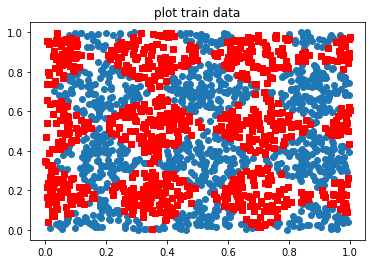

score1 first element -39.24626396989197
sample size 2000
1029 from class1 and 971 from class 2 estimated out of 2000 samples
Miss-classified points: 108 out of 2000, accuracy in estimation on the new dataset:0.946000


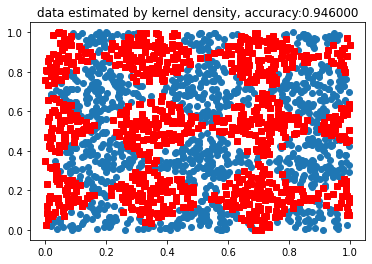

In [ ]:

size_train_samples = 2000
X, y = gen_cb(size_train_samples, .25, 3.14159 / 4)
print(y.shape)

size_test_samples = 2000
X_test, y_test = gen_cb(size_test_samples, .25, 3.14159 / 4)


plt.figure()
plt.title('plot train data')
plt.plot(X[np.where(y == 1)[0], 0], X[np.where(y == 1)[0], 1], 'o')
plt.plot(X[np.where(y == 2)[0], 0], X[np.where(y == 2)[0], 1], 's', c='r')
plt.show()

# data for class 1
X1 = X[np.where(y == 1)[0], :]
# data for class 2
X2 = X[np.where(y == 2)[0], :]

# priori of each class
priori_c1 = X1.shape[0]/size_test_samples
log_priori_c1 = np.log(priori_c1)
priori_c2 = X2.shape[0]/size_test_samples
log_priori_c2 = np.log(priori_c2)

# Kernel density functions to fit model on the train data
kdfX1 = KernelDensity(kernel='gaussian', bandwidth=0.005).fit(X1)
kdfX2 = KernelDensity(kernel='gaussian', bandwidth=0.005).fit(X2)

# Getting log likelihood of each sample
score1 = kdfX1.score_samples(X_test)#p(xi|w1)
score2 = kdfX2.score_samples(X_test)#p(xi|w1)
print("score1 first element",score1[0])
test_postrior_estimate = estimate_postrior(X_test, score1, score2, log_priori_c1, log_priori_c2)
c1 = 0
c2 = 0
for i in range(test_postrior_estimate.shape[0]):
  if test_postrior_estimate[i] == 1:
    c1 += 1
  else:
    c2 += 1  
print("%d from class1 and %d from class 2 estimated out of %d samples" %(c1, c2, size_test_samples)) 

classified_points = 0
for i in range(size_test_samples):
  if y_test[i] == test_postrior_estimate[i]:
    classified_points += 1
accuracy_estimation = classified_points / y_test.shape[0]    
print("Miss-classified points: %d out of %d, accuracy in estimation on the new dataset:%f" %(size_test_samples-classified_points,
                                                                                size_test_samples, accuracy_estimation))    
   
plt.figure()
plt.title('data estimated by kernel density, accuracy:%f'%(accuracy_estimation))
plt.plot(X_test[np.where(test_postrior_estimate == 1)[0], 0], X_test[np.where(test_postrior_estimate == 1)[0], 1], 'o')
plt.plot(X_test[np.where(test_postrior_estimate == 2)[0], 0], X_test[np.where(test_postrior_estimate == 2)[0], 1], 's', c='r')




# My implementation of Parzen Window density estimator from scratch

In [ ]:
# Gaussian kernel
def gaussian_kernel(bandwidth, x, x_i):
  
  first_term = 1/((math.sqrt(2*math.pi))*(h)**2)
  second_term = np.exp((-1/2) * (((x-x_i)/h)**2))
  phi_x = first_term * second_term
  
 
 
  pdf = (np.sqrt(2*np.pi*bandwidth**2)**-1) * np.exp(-((x - x_i)**2)/(2*bandwidth**2))
  return pdf

In [ ]:
# Parzen window function
def Parzen_window_function(x_vec, h):
  
  for row in x_vec:
    if np.abs(row) > h:
      return 0

  return 1


In [ ]:
def Parzen_estimator(x_samples, point_x, h):
  n = x_samples.shape[0]
  k_n = 0
  for i in range(n):
    x_i = gaussian_kernel(h, point_x, x_samples[i])
    k_n += Parzen_window_function(x_i, h)

  return k_n / (h * n)
 

score1 first element 40.13220018885741
Miss-classified points: 159 out of 2000, accuracy in estimation on the new dataset:0.920500


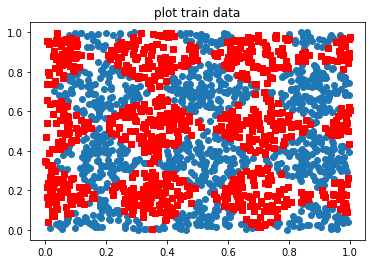

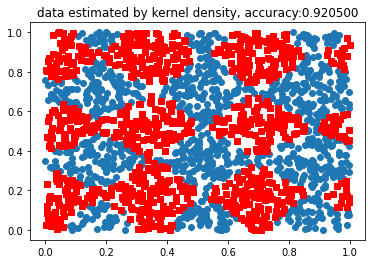

In [ ]:
h =  0.02

kde_scores_class1 = []
kde_scores_class2 = []

for i in range(X_test.shape[0]):
  kde_scores_class1.append(Parzen_estimator(X1, X_test[i], h))
#for i in range(X_test.shape[0]):
  kde_scores_class2.append(Parzen_estimator(X2, X_test[i], h))  

kde_scores_class1 = np.array(kde_scores_class1)
print("score1 first element",kde_scores_class1[0])
kde_scores_class2 = np.array(kde_scores_class2)


likelihood_new = []
for i in range(size_test_samples):
  if kde_scores_class1[i] < kde_scores_class2[i]:
    likelihood_new.append(1.0)
  else:
    likelihood_new.append(2.0)  
likelihood_new = np.array(likelihood_new)
classified_points = 0
for i in range(size_test_samples):
  if y_test[i] == likelihood_new[i]:
    classified_points += 1
accuracy_estimation = classified_points / y_test.shape[0]    
print("Miss-classified points: %d out of %d, accuracy in estimation on the new dataset:%f" %(size_test_samples-classified_points,
                                                                                size_test_samples, accuracy_estimation))    

plt.figure()
plt.title('plot train data')
plt.plot(X[np.where(y == 1)[0], 0], X[np.where(y == 1)[0], 1], 'o')
plt.plot(X[np.where(y == 2)[0], 0], X[np.where(y == 2)[0], 1], 's', c='r')
plt.show()

plt.figure()
plt.title('data estimated by kernel density, accuracy:%f'%(accuracy_estimation))
plt.plot(X_test[np.where(likelihood_new == 1)[0], 0], X_test[np.where(likelihood_new == 1)[0], 1], 'o')
plt.plot(X_test[np.where(likelihood_new == 2)[0], 0], X_test[np.where(likelihood_new == 2)[0], 1], 's', c='r')




Missclassified point in my implementation is pretty close to the built-in function from sklearn library

In [ ]:
def plot_contour(x,y,z,resolution = 50,contour_method='linear'):
    resolution = str(resolution)+'j'
    X,Y = np.mgrid[min(x):max(x):complex(resolution),   min(y):max(y):complex(resolution)]
    points = [[a,b] for a,b in zip(x,y)]
    Z = griddata(points, z, (X, Y), method=contour_method)
    return X,Y,Z

X,Y,Z = plot_contour(X_test[:,0],X_test[:,1],likelihood_new,resolution = 50,contour_method='linear')

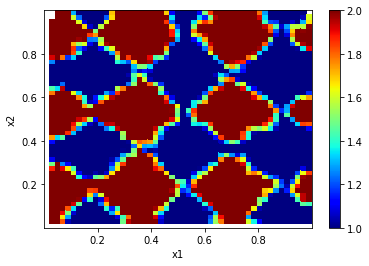

In [ ]:
#ploting P(x|y)with pcolor
plt.pcolor(X,Y, Z, cmap = 'jet')  
plt.colorbar() 
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Text(0, 0.5, 'x2')

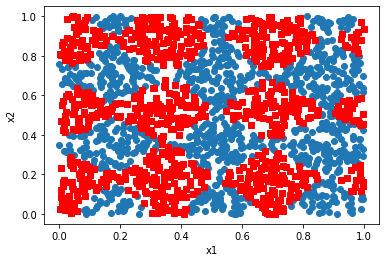

In [ ]:
#ploting P(x|y)with plot
plt.plot(X_test[np.where(likelihood_new==1)[0], 0], X_test[np.where(likelihood_new==1)[0], 1], 'o')
plt.plot(X_test[np.where(likelihood_new==2)[0], 0], X_test[np.where(likelihood_new==2)[0], 1], 's', c = 'r')
plt.xlabel("x1")
plt.ylabel("x2")

In [102]:
!jupyter nbconvert --to html /content/HW2.ipynb

[NbConvertApp] Converting notebook /content/HW2.ipynb to html
[NbConvertApp] Writing 561881 bytes to /content/HW2.html
